In [57]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt

This next cell reads the image and the following one prints it as well as saves it as a png.

In [58]:
h = fits.open("image.fits")
data = h[0].data.astype(np.float64)


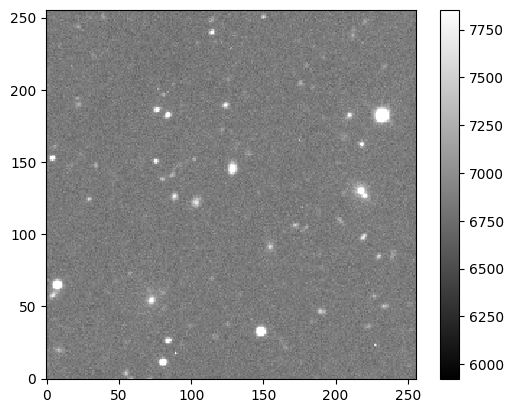

In [59]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

plt.savefig("fig1.png", dpi=150)
plt.show()

The next cells have to do with estimating and subtracting the background. When printing each image of the background and the background noise, I also saved them as png files.

In [60]:
bkg = sep.Background(data)

In [61]:
bkg_image = bkg.back()

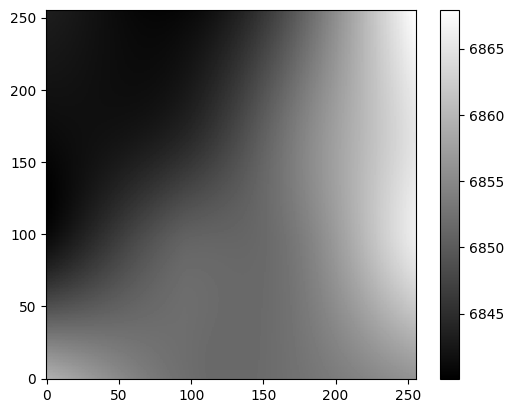

In [62]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

plt.savefig("fig2.png", dpi=150)
plt.show()

In [63]:
bkg_rms = bkg.rms()

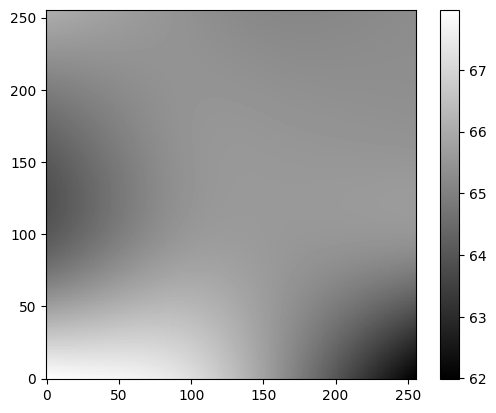

In [64]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

plt.savefig("fig3.png", dpi=150)
plt.show()

In [65]:
data_sub = data - bkg

After subtracting the background the next two cells have to do with object detection and then adding a red ellipse around each detected object.

In [66]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
print("Number of objects found:", len(objects))


Number of objects found: 68


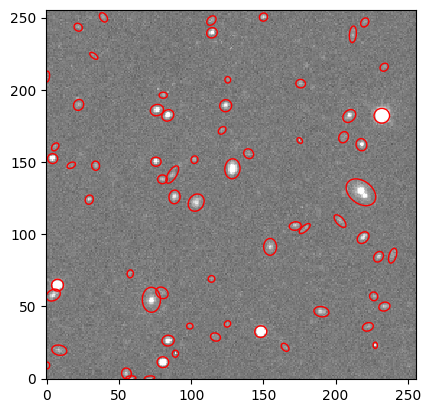

In [67]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig("fig4.png", dpi=150)
plt.show()
